### ![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

<a href="https://hub.callysto.ca/jupyter/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fcallysto%2Fhackathon&branch=master&subPath=SustainabilityOnMars/AmalTrack/ChallengeTemplate/challenge-template.ipynb&depth=1" target="_parent"><img src="https://raw.githubusercontent.com/callysto/curriculum-notebooks/master/open-in-callysto-button.svg?sanitize=true" width="123" height="24" alt="Open in Callysto"/></a>

# *Sustaining Life on Mars: Data Science Challenge*.

You‚Äôre a data scientist on a team of newly-arrived humans. While you were on Earth, you figured out how you could make the planet habitable. From growing food to clothing needs, you need to start building the framework for sustaining life on the red planet. 

Use data to answer questions such as:

1. What food do we need to bring?
        e.g. trees, seeds, genetically-modified foods
        
2. How do we feed people there?
        Consider: supply, manage, distribute, connect

7. What are essential key resources? 
        e.g. Electricity, oxygen, water, fuel, brick, plastics, steel, food. 

4. How do we decide who will go?
        e.g. population proportions, demographics, health, qualifications, genetic diversity

5. What forms of entertainment would people need? 
        e.g. music, books, pets, lego

6. What machines do we need? 
        e.g. cars, ships, fighter jets, rockets, computers, mobile phones.  
        
#### Choose one or more of these questions to answer, or come up with your own. Check out the example notebooks, and complete the sections in this notebook to answer your chosen question or questions

### Section I: About Me

Double-click this cell and tell us:

‚úèÔ∏è

For example

    1. The questions I picked: What machine(s) do we need? How do we get them? How much is enough?

### Section II: The data I used

Please provide the following information: (Double-click to edit this cell)

‚úèÔ∏è 
1. 2020 Canadian Aluminum Imports, Solar Power Generation and Breakeven Data
2. https://www.eics-scei.gc.ca/report-rapport/ALU2.csv, https://www.neb-one.gc.ca/open/energy/solar-power-generation-and-breakeven-economics-by-project-type-and%20community-data-set.csv
3. Costs of Canadian Imports of Aluminum will give us a rough estimate of the cost it would take to import/ mine metal on Mars, Cost of Solar Power will give a rough idea of solar power requirements on Mars.

If you picked multiple datasets, separate them using commas ","

In [1]:
# Use this cell to import libraries
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf




### Section III: Data Analysis and Visualization

Use as many code cells as you need - remember to add a title, as well as appropriate x and y labels to your visualizations. 

Make sure you write down what things you notice in the data such as trends, patterns, and basic statistics.

Use the code cell below to start adding your code for data analysis and visualization

### üë®üèΩ‚Äçüíª Provide your code to explore and analyse your data

So... We've got to Mars! üöÄüöÄüöÄ <br><br>
There's so much to do around here - after you're done playing with 38% of Earth's Gravity, you will need a place to sleep and to eat. And to do research. And to build more things. And to farm food. *And to...etc...* <br>
There's a lot of stuff to do, and we can't depend on human labour to build up civilization on Mars. <br>
Robots will take that job from us - self replicating robots has been extensively studied as a concept. If we could program a robot to gather resources, and to operate machinery to build more robots to do to the same thing, self sufficiency on Mars could be achieved! 

<br><br>
<div class="alert alert-block alert-warning">
 Getting there, however, will not be as easy.
</div>

<br><br>
Lots of questions remain, and this Jupyter Notebook will focus on the most crucial ones: (tense drumroll please)
<br>
How should we achieve self sufficiency (at least construction and labour wise)? <br>
Should we begin by sending prebuilt robots to Mars on spaceships or should we send materials to Mars? <br> 
How much energy is needed to make robots? How much material? <br> 

<br>
Exploring Space is mostly a matter of cost. So we'll be investigating when it would make more sense to send robots to Mars or when it would make more sense to build robots on Mars itself.

<br>

Let's start by calculating how much it would cost to send Robots on a spaceship. SpaceX's Falcon 9 rocket will be used as our payload delivery as it is the cheapest and most advanced. 

SpaceX Falcon 9 payload Capacity: 25,000 kg
https://web.archive.org/web/20080815163222/http://www.spacex.com/press.php?page=18
<br>
Costs 62 million dollars per rocket. 
<br>

Our Robot will be NASA's newly developed Valkyrie Robot. It weighs 125 kg.
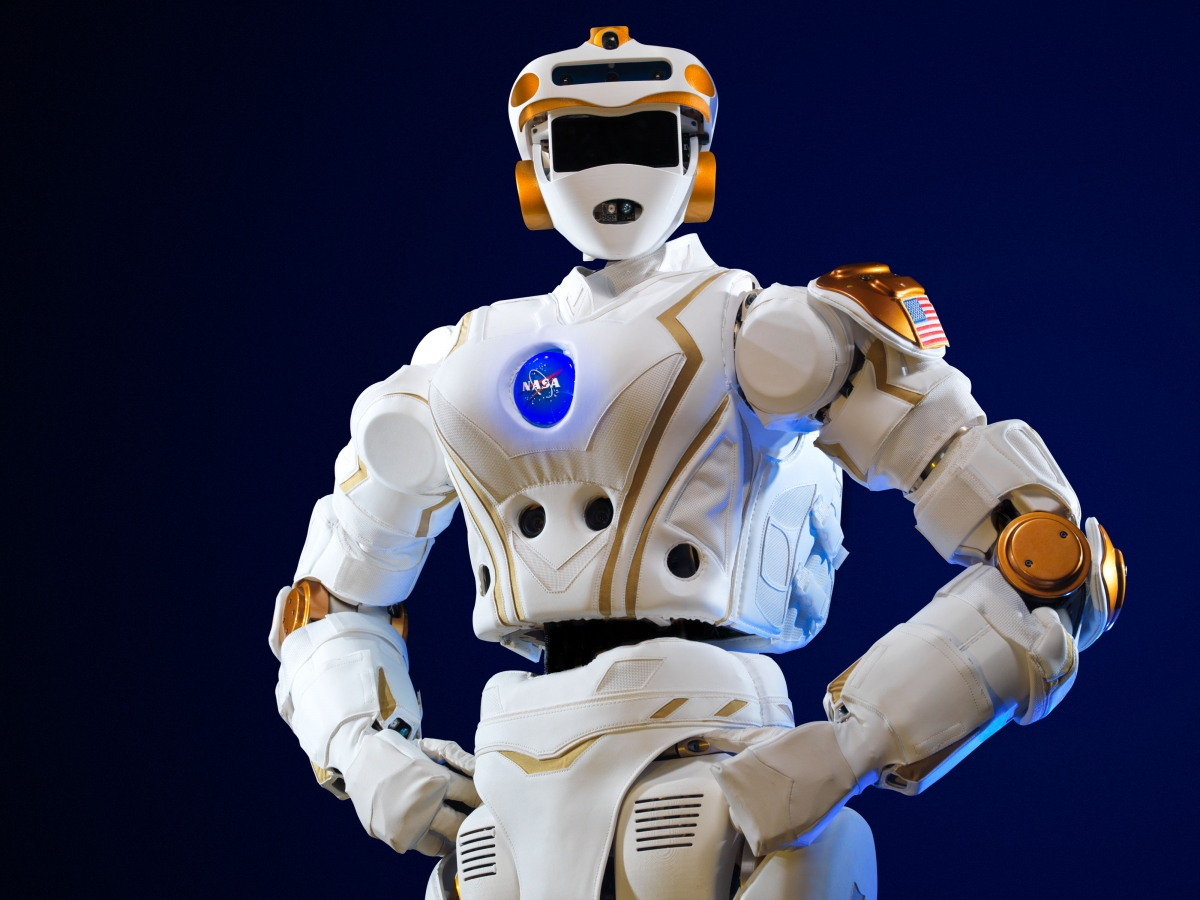

http://valkyrie.inf.ed.ac.uk/


    
   <div class="alert alert-block alert-info">
<b>Tip:</b> To calculate the unit cost to send a robot to Mars, we need to bring in a concept called <strong>Economies of Scale.</strong><br>As we upscale production, we gain a cost advantage in the form of lower unit costs. It costs $62 million to launch a Falcon 9 with 1 robot or at maximum capacity (200 robots). If we want to send 201 Robots we will have to get another rocket - increasing unit cost, but with each iteration, it keeps on getting cheaper to send stuff to Mars.
</div>
    
<br>
    
With this in mind, let's run a python loop to populate a DataFrame with the data. In the loop, for every 200 units sent to mars, 62 million is added to the total cost to calculate the Unit Cost. 

In [2]:
# Double-click this cell and provide your code here. Use as many code cells as you need to analyze and visualize your data. 
# Remember to add a title, as well as appropriate x and y labels to your visualizations
#Unit Cost for delivering Robots with spaceship



import pandas as pd
import cufflinks as cf
cf.go_offline()
cf.getThemes()
cf.set_config_file(theme='space')

numunits = []
unitcost = []

falcon9 = 62
for i in range(1,1000):
    numunits.append(i)
    unitcost.append(falcon9/i)
    if i % 200 == 0:
        falcon9 += 62
    





    
robots = {'Number of units': numunits,
        'Unit Cost': unitcost
        }

df = pd.DataFrame(robots, columns = ['Number of units', 'Unit Cost'])
rb = df[["Unit Cost"]]
rb.iplot(title = "Unit Cost for Robots shipped to Mars", xTitle = "Number of Robots",yTitle = "Millions of Dollars")
#df.plot(x='Number of units', y='Unit Cost')

As we can see, the Unit Price Decreases drastically from 62 million initially. The greatest curve in savings is for the first 200 Robots shipped to Mars. Later on the unit cost approaches a final value, which looks to be ~0.31 million ($310,000)

With this data in mind, now we're going to produce Robots on Mars, and see how the costs compare. <br>
NASA's Valkyrie boasts a huge array of components, all with its respective production costs:
- LIDAR Sensor
- 44 degrees of freedom with actuators
- 2 Intel i7 Processors
- 2 million dollars assembly cost
<br>
Let's break down the production into it's most essential parts. Drawing inspiration from programming fundamentals, production of robots on mars can be modelled with a simple input/output model. <br>


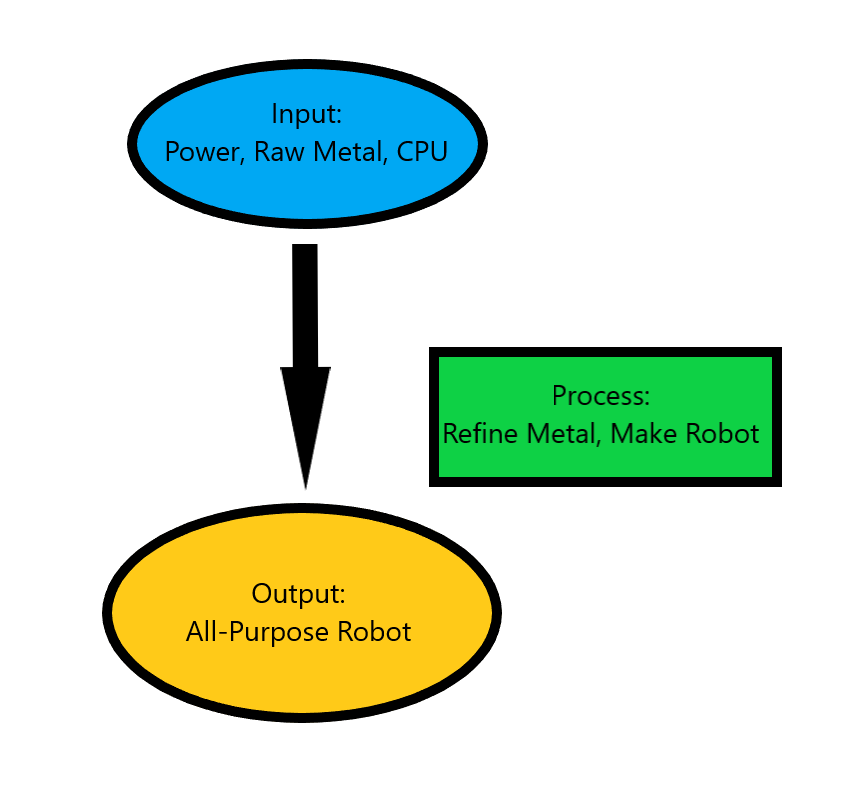

The **intermediate** steps (process) includes a bunch of complicated procedures to turn our inputs: Power, Metal and CPUs into a robot. The great thing about this I/O model is that **we won't have to concern ourselves with them!** <br>
All we need to worry about is the production cost and effort going into gathering the requirements for the input - How much metal/ power/ CPUs are needed to **make** a robot on Mars? (as opposed to shipping one from Earth) and how much does it cost? <br>Most importantly, how much can we save??<br>


To start, each robot also comes with 2 intel i7 Processors. These state of the art chips are not easy to manufacture on Earth, let alone Mars. Tools to machine CPUs are huge and expensive. They are carefully machined compoenents, so we will have to ship them from Earth. Again, we will be using the Falcon 9. 
    
   Weight of Intel Processor = 25 g 
   
   Falcon 9 Capacity / Weight of CPU = # of CPUs per trip
   
   25,000 kg / 0.025 kg = 1,000,000 CPUs can fit on one trip.
    
We will need to apply the concept of economies of scale again, since the unit cost of delivering CPUs to Mars will also decrease the more we send. <br> 
That will be done by populating a DataFrame with generated data. 
    

In [3]:
import cufflinks as cf
cf.go_offline()
cpu = []
falcon9 = 62
for i in range(1,10000):
    cpu.append(falcon9/i)
    if i % 1000000 == 0:
        falcon9 += 62
        
cpus = {'Number of CPUs' : cpu}
        
yu = pd.DataFrame(cpu, columns = ['Number of CPUs'])
rb = yu[['Number of CPUs']]
rb.iplot(title = "Unit Costs for CPUs shipped to Mars", xTitle="Number of CPUs", yTitle="Unit Cost, Millions of Dollars")

We're going to hang onto this piece of data for now. The total cost of a robot to be produced will be calculated by merging three cost data frames for Power, Metal, and CPU. <br>
The next step is to figure out the power needed to build a robot and the cost associated with that power. 

In [4]:
import pandas as pd
csv = 'https://www.neb-one.gc.ca/open/energy/solar-power-generation-and-breakeven-economics-by-project-type-and%20community-data-set.csv'
tr = pd.read_csv(csv, encoding = 'cp1252', nrows=999)
tr['Breakeven Price'] = tr["Breakeven Price ($/MWh)"].str[2:]
tr
#Avg = df['Breakeven Price'].mean()
#print("Average Cost per Mega Watt Hour of Solar Energy",Avg)
#chunksize = 10 ** 3
#for chunk in pd.read_csv(csv, chunksize=chunksize):
#    process(chunk)
#with open('https://www.neb-one.gc.ca/open/energy/solar-power-generation-and-breakeven-economics-by-project-type-and%20community-data-set.csv') as f:
#    print(f.encoding)

CGNDB ID Geographical Name             Generic Term Province - Territory  \
0      IAOOB             Vilna                  Village              Alberta   
1      IAOOB             Vilna                  Village              Alberta   
2      IAOOB             Vilna                  Village              Alberta   
3      IAOOB             Vilna                  Village              Alberta   
4      IAOOB             Vilna                  Village              Alberta   
..       ...               ...                      ...                  ...   
994    FABRT           Addison  Compact Rural Community              Ontario   
995    FABRT           Addison  Compact Rural Community              Ontario   
996    FABRT           Addison  Compact Rural Community              Ontario   
997    FABRT           Addison  Compact Rural Community              Ontario   
998    FABRT           Addison  Compact Rural Community              Ontario   

     Latitude  Longitude  Nearest NSRDB latitude  Nearest NSRDB longitude  \
0       54.11    -111.92                   54.13                  -111.94   
1       54.11    -111.92                   54.13                  -111.94   
2       54.11    -111.92                   54.13                  -111.94   
3       54.11    -111.92                   54.13                  -111.94   
4       54.11    -111.92                   54.13                  -111.94   
..        ...        ...                     ...                      ...   
994     44.66     -75.88                   44.65                   -75.90   
995     44.66     -75.88                   44.65                   -75.90   
996     44.66     -75.88                   44.65                   -75.90   
997     44.66     -75.88                   44.65                   -75.90   
998     44.66     -75.88                   44.65                   -75.90   

          Array Type Market Pricing  ... Spring Generation (MWh) - First Year  \
0      Utility Fixed    Time of use  ...                             18884.44   
1      Utility Fixed           Flat  ...                             18884.44   
2          Community    Time of use  ...                                75.53   
3          Community           Flat  ...                                75.53   
4    Utility Tracker    Time of use  ...                             23650.59   
..               ...            ...  ...                                  ...   
994      Residential           Flat  ...                                 1.80   
995  Utility Tracker    Time of use  ...                             22090.79   
996        Community           Flat  ...                                71.87   
997    Utility Fixed           Flat  ...                             17967.56   
998  Utility Tracker    Time of use  ...                             22090.79   

     Summer Generation (MWh) - First Year  Fall Generation (MWh) - First Year  \
0                                20003.27                            17775.99   
1                                20003.27                            17775.99   
2                                   80.01                               71.10   
3                                   80.01                               71.10   
4                                25755.45                            21566.05   
..                                    ...                                 ...   
994                                  2.18                                1.81   
995                              26615.00                            22778.22   
996                                 85.11                               75.72   
997                              21277.51                            18930.08   
998                              26615.00                            22778.22   

     Installation Cost Scenario  Breakeven Price ($/MWh)  \
0                       Current                   $64.37   
1                       Current                   $8

This is Open Data from the Government of Canada about Solar Energy Costs. We'll use this to estimate the cost of power to produce a robot on Mars, since we'll most likely be using solar there too. <br>
We've also calculated the mean price in dollars per Mega Watt Hour. <br><br>


This, in turn with a dataset containing prices of aluminum imported to Canada, will give us a rough picture of how much it costs to gather the materials required to build that robot. 

The dataset already has a column for price per weight, but we want to convert it into consistent units, in this case kg.

In [5]:
csv = 'https://www.eics-scei.gc.ca/report-rapport/ALU2.csv'
op = pd.read_csv(csv)
op["C/Kg"]=(op["C$/Tonne"] / 1000) 
Avg=op["C/Kg"].mean()
print(op)
print("Average Cost per kg of Aluminum",Avg)

     Product Category   Month Country of Origin Country of Export   \
0               Alloys      1        AE                        NaN   
1               Alloys      1        AU                        NaN   
2               Alloys      1        BH                        NaN   
3               Alloys      1        BH                        NaN   
4               Alloys      1        CN                        NaN   
...                ...    ...               ...                ...   
4148              Wire      8        US                        NaN   
4149              Wire      8        US                        NaN   
4150              Wire      8        US                        NaN   
4151              Wire      8        US                         US   
4152              Wire      8        US                         US   

     State of Export                          Port of Entry     Tonnes  \
0                 NaN                             Fort Erie   39.91600   
1          

Based on that Average Calculation, a kilogram of Aluminum imported will cost around 7.6 dollars, and average cost of MWh of Power is 85.46 dollars. <br>

Putting all the pieces together, let's figure out the cost of building and assembling a robot from scratch. 

NASA's Valkyrie wide array of sensors and equipment has often been compared to a self driving car. The average american family car needs 119,150 MJ of energy in production and assembly costs. (http://energyskeptic.com/2015/how-much-energy-does-it-take-to-make-a-car-by-david-fridley-lbl/)

The power cost can be calculated by converting those MJ required to MWh. 

MJ / 3600 = MWh
119150 / 3600 = 33.0972 MWh

MWh * Avg Cost/Mwh = Power Cost per Robot

33.0972 * 85.46 = 2828.486 dollars

The Material Cost can be calculated by multiplying 125 kg by the cost per kg of aluminum   

125 kg * Avg Cost/kg = Material Cost per Robot
125 * 7.6 = 950 dollars

With this information, let's populate a dataFrame combining CPU cost, Power Cost, and Material Cost to determine the total overall cost of producing a robot. 
Also, we're going to factor in the 2 million dollars assembly cost - since all the previous variables above only apply to raw materials. 





In [6]:
totalcost = []

for i in range(1,10000):
    totalcost.append(950+2828.486+cpu[i-1]+2000000)
totalcosts = {'Total Production Cost per Robot': totalcost} 
rd=pd.DataFrame(totalcosts, columns=['Total Production Cost per Robot'])
rd.iplot(title = "Total Production Costs", xTitle = "Number of Robots", yTitle="Unit Cost")

Finally, make a new dataFrame with the Costs for Production on Earth and Cost for Production on Mars to compare the costs.  

### Observations
Double-click this cell and write down at least 2 - 3 things or more you observed in your data through your analysis and visualizations.

It can be seen through the Graph Overlay that it's more cost efficient to produce robots on Mars for the very first few. Then it becomes so much more cost efficient to just mass send robots to Mars, all the way until infinity (Cost 2 million vs 0.31 million). 

‚úèÔ∏è 

### Section IV: Conclusion

It is crucial that you connect what you learned via the dataset to the main question(s) you are asking. 

Use this space to propose a solution to the question you picked. Make sure it is clear in your answer what area of development you chose to focus on and your proposed solution based on the dataset(s) you worked on. 

See our example notebooks for some inspiration on questions and solutions that you can develop using data.

This Hackathon really pushed me to recognize the limits of robot self sufficiency. Turns out that making a long term habitat on Mars would be really tough. Looking at the Metal and Power DataFrames really made me realize how expensive solar Power on Mars would be for example. 

‚úèÔ∏è 

### [![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)